# 3.5 Modelo de Clasificación Árbol de Decisión

### Miguel Ángel Jiménez Cuadrillero
### 2020


## Algoritmos de árbol: ID3, C4.5, C5.0 y CART 

¿Cuáles son los diversos algoritmos de árbol de decisión y cómo se diferencian entre sí? ¿Cuál se implementa en scikit-learn?

ID3 (dicotomizador iterativo 3) fue desarrollado en 1986 por Ross Quinlan. El algoritmo crea un árbol de múltiples vías, encontrando para cada nodo (es decir, de manera codiciosa) la característica categórica que generará la mayor ganancia de información para objetivos categóricos. Los árboles crecen hasta su tamaño máximo y luego se aplica un paso de poda para mejorar la capacidad del árbol de generalizar a datos no vistos.

C4.5 es el sucesor de ID3 y eliminó la restricción de que las características deben ser categóricas definiendo dinámicamente un atributo discreto (basado en variables numéricas) que divide el valor del atributo continuo en un conjunto discreto de intervalos. C4.5 convierte los árboles entrenados (es decir, la salida del algoritmo ID3) en conjuntos de reglas si-entonces. Luego se evalúa la precisión de cada regla para determinar el orden en que deben aplicarse. La poda se realiza eliminando la condición previa de una regla si la precisión de la regla mejora sin ella.

C5.0 es el último lanzamiento de la versión de Quinlan bajo una licencia patentada. Utiliza menos memoria y crea conjuntos de reglas más pequeños que C4.5 a la vez que es más preciso.

CART (Árboles de clasificación y regresión) es muy similar a C4.5, pero difiere en que admite variables objetivo numéricas (regresión) y no calcula conjuntos de reglas. CART construye árboles binarios usando la característica y el umbral que producen la mayor ganancia de información en cada nodo.

scikit-learn utiliza una versión optimizada del algoritmo CART; sin embargo, la implementación de scikit-learn no admite variables categóricas por ahora.

*OBJETIVO*: Predecir la especie de flor en función de sus características. Es un problema de clasificación, no de regresión, por lo tanto se evalúa de una forma distinta.

## Carga de Datos

In [2]:
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
from sklearn.model_selection import train_test_split
plt.figure(figsize=(20,5))

random_state = 123

from sklearn import datasets

<Figure size 1440x360 with 0 Axes>

In [4]:
df = pd.read_csv("./datasets/iris.csv", sep=',')

## Análisis Exploratorio de Datos

In [5]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [6]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


## Estudio numérico de datos

In [8]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Visualización de Datos

Representamos scatterplots de las variables dos a dos. En la diagonal tenemos el histograma de la variable en cuestión.

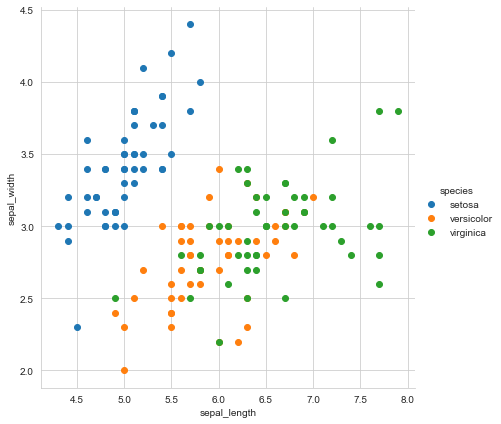

In [9]:
sns.set_style("whitegrid") 
  
sns.FacetGrid(df, hue ="species", height = 6).map(plt.scatter, 'sepal_length', 'sepal_width').add_legend() 

## Interpretación preliminar


En el gráfico anterior vemos que hay una relacion entre las especies y sus tamaños aunque hay zonas donde la región de decisión no está muy clara.

## Entrenamiento del Modelo



## Selección de Features y Label

La fórmula de la función f(X) = y que queremos ajustar mediante un modelo de LDA sobre los datos es Species ~ . en formato R, es decir, utilizar todas las variables disponibles para predecir la especiel, en scikit-learn sólo tendremos que separar el target o label a predecir.


## División Train/Test


In [10]:
df = pd.read_csv("./datasets/iris.csv", sep=',')

y = df.pop('species').values
X = df.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=random_state)

## Configuración del Modelo

Los predictores de entrada en este caso no se establecen como una formula si no que asume que son todas las columnas que se le pase al método fit.

Se realiza un encoding de la label

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html


In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
print(y)
y = le.fit_transform(y)
print(y)
y_test = le.transform(y_test)
y_train = le.transform(y_train)

['setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'v

In [51]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=random_state)
tree = tree.fit(X, y)

### Evaluación del Ajuste del Modelo

Validamos el ajuste del modelo a los datos de entrenamiento. Esto sólo nos sirve para descartar situaciones en las que ni con los propios datos de entrenamiento se ajusta el modelo, es decir, que los datos no tienen ninguna capacidad predictiva.

En este caso siendo el accuracy tan alto y sabiendo que los árboles se ajustan mucho a los datos de entrenamiento, estamos ante un caso de overfitting, más adelante veremos como tratar esta situación.

In [53]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

y_pred = tree.predict(X)

print('\nAccuracy ' + str(accuracy_score(y, y_pred)))


Accuracy 1.0


In [54]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree, X, y, cv=5)
scores

array([0.96666667, 0.96666667, 0.9       , 0.96666667, 1.        ])

## Representación gráfica del árbol

Requiere un ajuste en el path para que funcione. Además hay que instalar la libreria Graphviz del siguiente enlace:

https://graphviz.gitlab.io/_pages/Download/Download_windows.html

In [55]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

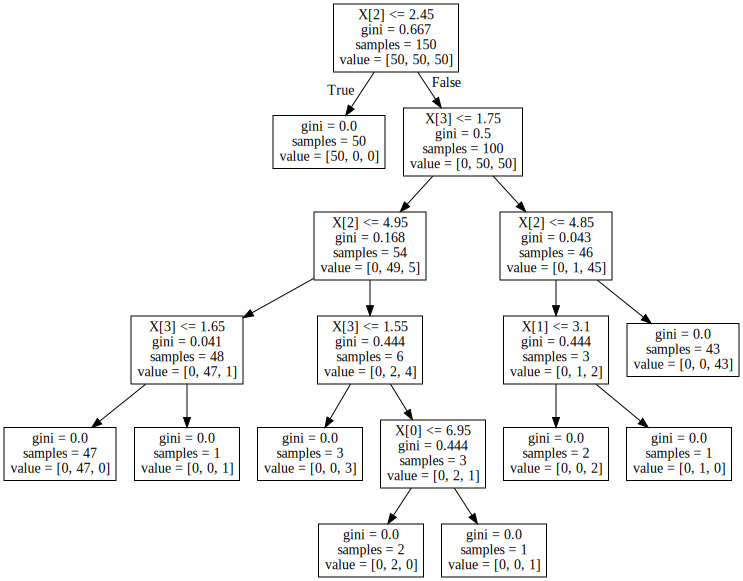

In [57]:
import graphviz 
from sklearn.tree import export_graphviz

dot_data = export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
#graph.render("iris") 

graph = graphviz.Source(dot_data)  
graph 

## ¿Cómo podemos podar el árbol?

En el caso de scikit learn, no podemos podar un árbol depués de crearlo, tenemos que hacerlo a priori, poniendo algunos límites.

Por ejemplo:

* max_depth : limitar la máxima profundidad del árbol nos dará un conjunto de ramas que serán más generales ya que no ha podido profundizar mucho en el árbol hasta llegar al ajuste de muestra por muestra.

* min_samples_split: aumentar el número de muestras para hacer un split ayuda a no sobreajustar ya que necesitará que haya un número mayor de casos que tengan una casuística similar para hacer un split, esto ayuda a que la decisión del split sea más generalizable al estar basada en más ejemplos. El caso extremo sería una muestra mínima por split que podría ajustarse completamente al ruido.


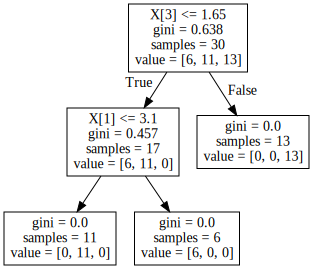

In [89]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth = 3, min_samples_leaf= 5, random_state=random_state)
tree = tree.fit(X_train, y_train)

import graphviz 
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree, out_file=None) 
graph = graphviz.Source(dot_data) 
#graph.render("iris") 

graph = graphviz.Source(dot_data)  
graph 

In [90]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

y_pred = tree.predict(X_test)

print('\nAccuracy ' + str(accuracy_score(y_test, y_pred)))


Accuracy 0.8083333333333333


In [91]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree, X_train, y_train, cv=5)
scores

array([1.        , 1.        , 1.        , 0.83333333, 1.        ])

## Consejos sobre uso práctico 

Los árboles de decisión tienden a sobreajustar los datos con una gran cantidad de características. Es importante obtener la proporción correcta de muestras y cantidad de características, ya que es muy probable que un árbol con pocas muestras en un espacio de alta dimensión se sobreajuste.

Considere realizar una reducción de dimensionalidad (PCA, LDA) de antemano para darle a su árbol una mejor oportunidad de encontrar características que sean discriminantes.

Hay que visualizar el árbol mientras entrena para evaluar el sobreajuste. Se empieza con max_depth=3 como profundidad de árbol inicial para tener una idea de cómo el árbol se ajusta a los datos, y luego se aumenta la profundidad.


Use min_samples_split o min_samples_leaf para asegurarse de que varias muestras aportan información para cada decisión en el árbol, controlando qué divisiones serán consideradas. Un número muy pequeño generalmente significará que el árbol se sobreajustará, mientras que un número grande evitará que el árbol aprenda de los datos. Intentar min_samples_leaf=5 como un valor inicial.

Equilibre su conjunto de datos antes de entrenar para evitar que el árbol se sesgue hacia las clases dominantes. El equilibrio de clase se puede hacer muestreando un número igual de muestras de cada clase, o preferiblemente normalizando la suma de los pesos de muestra ( sample_weight) para cada clase al mismo valor. También tenga en cuenta que los criterios de poda previa basados en el peso, como por ejemplo min_weight_fraction_leaf, estarán menos sesgados hacia las clases dominantes que los criterios que no conocen los pesos de la muestra, como min_samples_leaf.

Si las muestras se ponderan, será más fácil optimizar la estructura del árbol utilizando criterios de poda previa basados en el peso, como por ejemplo min_weight_fraction_leaf, que aseguran que los nodos de las hojas contengan al menos una fracción de la suma total de los pesos de la muestra.

# Cuando usar Árboles de Decisión

Desde el punto de vista de la precisión es una técnica ampliamente superada por otras. Además hoy en día la potencia de computación está más al alcance de cualquier compañía que hace 20 años por lo que no el performance de entrenamiento no es tan crítico como para elegir esta técnica.

Pero si hay que elegirla cuando prima la explicabilidad del modelo y cuando funciona igual de bien que otros modelos mucho más complejos.